## Import Libraries and Data Load

In [1]:
# import os
# os.environ["PROJ_LIB"] = r'C:\Users\avija\anaconda3\Library\share'
# from mpl_toolkits.basemap import Basemap

In [2]:
# ! pip install branca==0.4.1 #0.3.1
# ! pip install wordcloud

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import branca.colormap as cm
# from mpl_toolkits.basemap import Basemap
import requests
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from tqdm import tqdm, notebook
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# df = pd.read_csv(os.path.join(dirname, filename))
# df.head()

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('march_tweets.csv')

In [7]:
# df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')

In [8]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Samaa Health,"Karachi, Pakistan","@SAMAATV's updates, reporting & fact-checks on health stories & news from Pakistan | Ask Dr Taneer Ahmed @TaneerAhmed | Spreading info, not virals...",2020-02-03 06:41:20,4305,53,121,False,2021-03-30 08:16:45,Senior government officials who have recently contracted #COVID19 during the 3rd wave:\n-President Arif Alvi\n-Prime Minister Imran Khan \n-Defence Minister Pervez Khattak\n-Muhammad Hafeez Shaikh (former finance minister),['COVID19'],Twitter Web App,False
1,ABS-CBN News Channel,Philippines,News updates & breaking news from the Philippines. Like our Facebook page: http://t.co/xr1ETuyubS.,2009-06-04 21:26:24,5083272,768,5395,True,2021-03-30 08:16:43,"PH logs more than 9,000 add’l #COVID19 cases for 5th straight day, highest number of active cases https://t.co/Nygl7MO9Q0",['COVID19'],TweetDeck,False
2,The Lancet,"London, New York, Beijing","Welcome to The Lancet on Twitter. Keep in touch with The Lancet, one of the world's leading general medical journals, published weekly since 1823 #FutureChild",2009-03-27 14:24:45,639576,296,4675,True,2021-03-30 08:16:42,"PH logs more than 9,000 add’l #COVID19 cases for 5th straight day, highest number of active cases https://t.co/Nygl7MO9Q0",NaN,HubSpot,False
3,scamnum tergum patriae amore,NaN,"Waiting for the big kick off, \nSuffering from Covid Common Sense,\n#NoKnee , #NoMask , #NeverClapped , \n#DefundTheBBC\nProud to be British, No to the EU,",2020-04-13 14:56:25,1480,1710,33935,False,2021-03-30 08:16:38,"Considering the list of symptoms for #Covid19 seems to be growing everyday, does anyone else find it odd that you can have Covid without displaying a single one of the 453 known symptoms?",['Covid19'],Twitter Web App,False
4,Kristin Mae Smith,American in Bavaria 🇺🇸,The Fact-Checking era is not interested in facts or scientific integrity. They’re interested in controlling the FLOW of information. Cancel Culture Is Toxic.🗽,2020-04-08 14:05:49,155,472,2366,False,2021-03-30 08:16:36,"Vaccine madness. Check it out, vaccine passports violate HIPAA &amp; the Nuremberg Code. So, no, also, the vaccines are still in trial (on the general public) until 2023. I see no emergency for this EUA contract... they need to quit lying about #COVID19 deaths and cases. https://t.co/DneYw2c55k",NaN,Twitter for iPhone,False


## Exploration Data Analysis (EDA)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82758 entries, 0 to 82757
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         82757 non-null  object
 1   user_location     65750 non-null  object
 2   user_description  78905 non-null  object
 3   user_created      82758 non-null  object
 4   user_followers    82758 non-null  int64 
 5   user_friends      82758 non-null  int64 
 6   user_favourites   82758 non-null  int64 
 7   user_verified     82758 non-null  bool  
 8   date              82758 non-null  object
 9   text              82758 non-null  object
 10  hashtags          60191 non-null  object
 11  source            82194 non-null  object
 12  is_retweet        82758 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 7.1+ MB


In [10]:
df.date.min(), df.date.max()

('2021-03-26 16:29:41', '2021-03-30 08:16:45')

In [11]:
# There are no retweets in the data
df['is_retweet'].value_counts()

False    82758
Name: is_retweet, dtype: int64

In [12]:
# ~15% tweets have been tweeted by verified users
df['user_verified'].value_counts(normalize=True)

False    0.850975
True     0.149025
Name: user_verified, dtype: float64

In [13]:
df.describe()

,user_followers,user_friends,user_favourites
count,8.275800e+04,82758.000000,8.275800e+04
mean,1.062476e+05,2270.286570,1.488459e+04
std,8.243341e+05,12995.083144,4.750277e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,2.110000e+02,170.000000,2.540000e+02
50%,1.177000e+03,564.000000,1.995000e+03
75%,5.966000e+03,1696.000000,9.774750e+03
max,1.491777e+07,517317.000000,1.216563e+06


<AxesSubplot:>

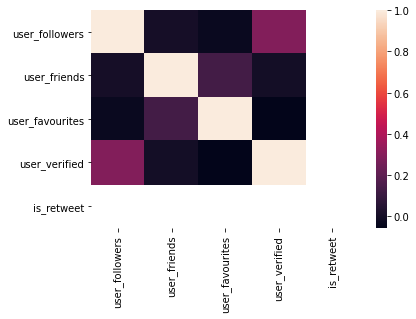

In [14]:
sns.heatmap(df.corr())

## Detailed Analysis

In [15]:
# Make a copy of dataframe before making any changes
tweets = df.copy()

In [16]:
# Convert date columns to datetime data type from object
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])
tweets['date_ext'] = tweets['date'].dt.date

In [17]:
# Take care of nulls in location and description
tweets.user_location.fillna('Unknown', inplace=True)
tweets.user_description.fillna('Unknown', inplace=True)
tweets.source.fillna('Unknown', inplace=True)
tweets.hashtags.fillna('None', inplace=True)

In [18]:
# Verify
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82758 entries, 0 to 82757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         82757 non-null  object        
 1   user_location     82758 non-null  object        
 2   user_description  82758 non-null  object        
 3   user_created      82758 non-null  datetime64[ns]
 4   user_followers    82758 non-null  int64         
 5   user_friends      82758 non-null  int64         
 6   user_favourites   82758 non-null  int64         
 7   user_verified     82758 non-null  bool          
 8   date              82758 non-null  datetime64[ns]
 9   text              82758 non-null  object        
 10  hashtags          82758 non-null  object        
 11  source            82758 non-null  object        
 12  is_retweet        82758 non-null  bool          
 13  date_ext          82758 non-null  object        
dtypes: bool(2), datetime64

In [19]:
abbreviations = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
abbreviations.columns

Index(['State', 'Abbreviation'], dtype='object')

In [20]:
# Attempt tp clean the location column. There are many other business rules that can be applied to 
# improve the accuracy of different cases. We can also use regular expressions

# If both country and city is mentioned

tweets["country"] = tweets.user_location.apply(lambda x: x.split(",")[-1].strip() \
                                            if ("," in x) else x)
tweets["city"] = tweets.user_location.apply(lambda x: x.split(",")[0].strip() \
                                            if ("," in x) else x)

# Replacing 2 digit US states with USA except UK
# tweets["country"] = tweets.country.apply(lambda x: 'USA' if x.lower().strip() in \
#                                       ("united states, usa, us") else x)
tweets["country"] = tweets.country.apply(lambda x: 'USA' if x in list(abbreviations['State']) or x in list(abbreviations['Abbreviation']) else x)
tweets["country"] = tweets.country.apply(lambda x: 'USA' if (x.find('USA') != -1) else x)

tweets["country"] = tweets.country.apply(lambda x: 'India' if x.lower().strip() in \
                                      ("india") else x)

# #Removing countries from city column
# tweets["city"] = tweets.city.apply(lambda x: 'Unknown' if x.lower() in \
#                                    ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us', 'australia',
#                                     'california','worldwide', 'washington', 'new york', 'canada', 'south africa', 
#                                     'texas', 'england', 'florida', 'earth', 'switzerland', 'Text RESIST to 50409',
#                                     'new jersey','pakistan','ohio','europe','scotland'] \
#                                    else x)

## Plot heatmap to see the geographical distribution based on number of tweets

In [209]:
# disable chained assignments
pd.options.mode.chained_assignment = None

In [210]:
# Taking top 100 countries and cities excluding the unknown at index 0
top100_count = tweets.country.value_counts(sort=True, ascending=False)[1:1000]
top100_count = pd.DataFrame(top100_count)

top100_city= tweets.city.value_counts(sort=True, ascending=False)[1:200]
top100_city = pd.DataFrame(top100_city)

In [211]:
countries = open('countries.txt', 'r')
yourResult = [line.split('|') for line in countries.readlines()]

In [212]:
new = [i[1].rstrip() for i in yourResult]

In [213]:
top100_count.loc['United States', 'country']  = top100_count.loc['United States', 'country'] + top100_count.loc['USA', 'country'] 

In [214]:
top100_count.loc['United Kingdom', 'country'] = top100_count.loc['United Kingdom', 'country'] + top100_count.loc['UK', 'country'] + top100_count.loc['England', 'country'] + top100_count.loc['Ireland', 'country'] + top100_count.loc['Wales', 'country'] + top100_count.loc['Scotland', 'country']  

In [215]:
final_100_countries = top100_count[top100_count.index.isin(new)]

In [216]:
final_100_countries = final_100_countries[0:100]

In [217]:
major_cities = pd.read_csv('https://raw.githubusercontent.com/datasets/world-cities/master/data/world-cities.csv')

In [218]:
city_names = list(major_cities['name'])

In [219]:
final_100_city = top100_city[top100_city.index.isin(city_names)]

In [220]:
final_100_city.drop(index = ['Florida', 'Singapore'], inplace = True)

In [221]:
final_100_city = final_100_city[0:100]

In [222]:
final_100_city.rename(index = {'Washington' : 'Washington, D.C.'}, inplace = True)

In [223]:
final_100_countries.head()

,country
India,5307
Canada,1734
United Kingdom,5086
United States,17042
Australia,775


In [224]:
# def get_coordinates(input_type, name, output_as='center'):
#     """
#     Function to get coordinates of country/ city

#     Attributes
#     ----------
#     input_type : str
#         Pass 'country' or 'city' to generate the respective URL
#     name : str
#         Name of the country or city we need the coordinates for
#     output_as : str
#         Pass 'center' or 'boundingbox' depending upon what coordinates type to fetch
    
#     Methods
#     -------
#         Returns the coordinates of the country or city
#     """
#     # create url
#     url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?'+input_type+'='\
#                              ,name,'&format=json&polygon=0')
#     response = requests.get(url)
#     try:
#         response = response.json()[0]
#         # parse response to list
#         if output_as == 'center':
#             lst = [response.get(key) for key in ['lat','lon']]
#             output = [float(i) for i in lst]
#         if output_as == 'boundingbox':
#             lst = response[output_as]
#             output = [float(i) for i in lst]
#         return output
    
#     except (IndexError, ValueError):
#         # this will log the whole traceback
#         return [0,0]

In [225]:
# # Get the latitudes and longitudes for the top 100 countries and cities
# lat_long_count = [get_coordinates("country",coun) for coun in top100_count.index]
# lat_long_city = [get_coordinates("city",city) for city in top100_city.index]

In [226]:
# # Call the get_coodinates() and drop the duplicates from dataframe
# def top100_df(input_type,df,lat_long):
#     # merge lat and long with original dataframe
#     for i, pair in zip(df.index, lat_long):
#         df.loc[i,'lat'] = pair[0]
#         df.loc[i,'long'] = pair[1] 
#     # reset the index as country names
#     df.reset_index(level=0, inplace=True)
#     if input_type=="country":
#         df.rename(columns={"country":"# of tweets","index":"country"}, inplace=True)
#     elif input_type=="city":
#         df.rename(columns={"city":"# of tweets","index":"city"}, inplace=True)
#     # drop the countries/ cities with unidetified and duplicated latitudes and longitudes
#     df.drop_duplicates(subset=['lat','long'],inplace=True)
#     return df

In [227]:
# # Call the top100_df() to finalize the country and city dataframes 
# top100_count = top100_df("country",top100_count,lat_long_count)
# top100_city = top100_df("city",top100_city,lat_long_city)

#### We see that US, India, and England are the top 3 countries with the hightest tweets with USA having significantly higher tweets (~20%). The curve is almost flattened beyond the top 3 countries with ~2k (or less) tweets per country. <br> The top 5 cities with highest tweets are London, New Delhi, New York, Mumbai, Washington with each having 2k-3k tweets.

In [228]:
from geopy.geocoders import Nominatim
address='Washington, D.C.'
geolocator = Nominatim(user_agent="Your_Name")

In [229]:
def fill_vals(df, column):
    for i in df.index:
        location = geolocator.geocode(i)
        df.loc[i,'lat'] = location.latitude
        df.loc[i,'long'] = location.longitude
    return df

In [230]:
# from geopy.geocoders import Nominatim
# address='Washington, D.C.'
# geolocator = Nominatim(user_agent="Your_Name")

In [231]:
# location = geolocator.geocode(address)
# print(location.address)
# print((location.latitude, location.longitude))

In [240]:
final_100_city.shape

(100, 1)

In [241]:
final_100_countries.shape

(100, 1)

In [242]:
top_100_countries = fill_vals(final_100_countries, 'country')

In [243]:
top_100_cities = fill_vals(final_100_city, 'city')

In [244]:
top_100_countries.reset_index(level=0, inplace=True)
top_100_cities.reset_index(level=0, inplace=True)

In [245]:
top_100_countries.rename(columns = {'index' : 'name', 'country' : '# of tweets'}, inplace = True)

In [246]:
top_100_cities.rename(columns = {'index' : 'name', 'city' : '# of tweets'}, inplace = True)

In [265]:
# Create a heatmap using folium
def color(magnitude, num_tweets):
    percentile_75 = np.quantile(num_tweets, .75)
    if magnitude>=percentile_75:
        col='red'
    else:
        col='green'
    return col

# 35.693943, 20
def generateBaseMap(df,default_location=[35.693943, -40], default_zoom_start=1.5):
    """
    Function to generate the heatmap

    Attributes
    ----------
    input_type : str
        Pass 'country' or 'city' to generate the respective heatmap
    df : str
        Name of the dataframe having the country/city coordinates and other details
    default_location : int
        Pass the default location for the displayed heatmap
    default_zoom_start: int
        Pass the default zoom for the displayed heatmap
    
    Methods
    -------
        Returns the base_map
    """
        
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start, 
                          tiles='cartodb positron')
    marker_cluster = plugins.MarkerCluster().add_to(base_map)
    
    HeatMap(data=df[['lat','long']].values.tolist(),radius=25,max_zoom=13).add_to(base_map)
    for lat,lan,tweet,name in zip(df['lat'],df['long'],df['# of tweets'],df.iloc[:,0]): 
        # Marker() takes location coordinates as a list as an argument 
        folium.Marker(location=[lat,lan],popup = [name,tweet], 
                      icon= folium.Icon(color=color(tweet, df['# of tweets']), 
                      icon_color='white', icon='twitter', prefix='fa')).add_to(marker_cluster)
        
#     #specify the min and max values of your data
#     min, max = df['# of tweets'].min(), df['# of tweets'].max()
#     colormap = cm.LinearColormap(colors=['green', 'beige','red'], vmin=min,vmax=max)
   
#     colormap.caption = input_type.title() +' distribution of COVID-19 tweets'
#     colormap.add_to(base_map)
    return base_map

In [266]:
fig = generateBaseMap(top_100_countries)
fig

In [267]:
import plotly.express as px 
import datapane as dp 

report = dp.Report(dp.Plot(fig) ) #Create a report
report.publish(name='top_100_countries', open=True, visibility='PUBLIC') #Publish the report

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/adhvaith/reports/top-100-countries/


In [268]:
fig2 = generateBaseMap(top_100_cities)
fig2

In [269]:
import plotly.express as px 
import datapane as dp 


report = dp.Report(dp.Plot(fig2) ) #Create a report
report.publish(name='top_100_cities', open=True, visibility='PUBLIC') #Publish the report

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/adhvaith/reports/top-100-cities/


In [178]:
top_100_cities.sort_values(by = '# of tweets', ascending = False)

,name,# of tweets,lat,long
0,"Washington, D.C.",1909,38.894992,-77.036558
1,London,1693,51.507322,-0.127647
2,Toronto,1195,43.653482,-79.383935
3,Mumbai,933,19.075990,72.877393
4,New Delhi,927,28.613895,77.209006
5,Los Angeles,507,34.053691,-118.242766
6,Florida,497,27.756767,-81.463983
7,Vancouver,423,49.260872,-123.113953
8,Boston,394,42.360253,-71.058291
9,Chicago,326,41.875562,-87.624421


In [57]:
# # Top 10 twitter accounts being followed
# top10users = tweets.groupby(by=["user_name"])['Followers'].max().sort_values(ascending=False)[:10]
# test = top10users.to_frame().style.bar(color='cornflowerblue',vmin=0).set_properties(subset=['Followers'], **{'width': '400px'})
# test.index.rename('Twitter Handle', inplace = True)
# test

In [58]:
# top10countries = top50_countries.groupby(by=["country"])['# of tweets'].max().sort_values(ascending=False)[:10]
# test = top10countries.to_frame().style.bar(color='cornflowerblue', vmin = 0).set_properties(subset=['# of tweets'], **{'width': '400px'})
# test.index.rename('Country', inplace = True)
# test

In [59]:
# top10countries.to_csv('top_10_countries.csv', index = False)

In [60]:
# top10cities = top100_city.groupby(by=["city"])['# of tweets'].max().sort_values(ascending=False)[:10]
# test = top10cities.to_frame().style.bar(color='cornflowerblue', vmin=0).set_properties(subset=['# of tweets'], **{'width': '400px'})
# test.index.rename('City', inplace = True)
# test

In [61]:
# import pandas as pd
# import numpy as np
# import dataframe_image as dfi

In [62]:
# dfi.export(test,"mytable.png")

In [63]:
# Convert everything other than a-z, A-Z, 0-9 to space and remove the link from tweets
tweets['clean_tweet'] = tweets['text'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x))

### Create WordCloud

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
def createWordCloud(input_type, text):
    """
    Function to generate the wordcloud

    Attributes
    ----------
    input_type : str
        Pass 'words' or 'entities' to update the chart title based on the text passed
    text : str
        Name of the string text to make the wordcloud
    
    Methods
    -------
        Returns the wordcloud
    """
    wordcloud = WordCloud(width = 1000, height = 600, 
                      #colormap = 'Paired',
                      background_color ='white',
                      collocations = False,
                      stopwords=stop_words
                     ).generate(text)

    plt.figure(figsize = (12, 12), facecolor = None)
    plt.title("Most common "+ input_type +" in tweets \n", fontsize=27, color='Black')
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [66]:
# Create a wordcloud for most popular words in tweets
text = '' 
stop_words = set(stopwords.words("english"))
for row in tweets['clean_tweet']:
    # typecaste each row to string and split it to get tokens
    tokens = str(row).split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "


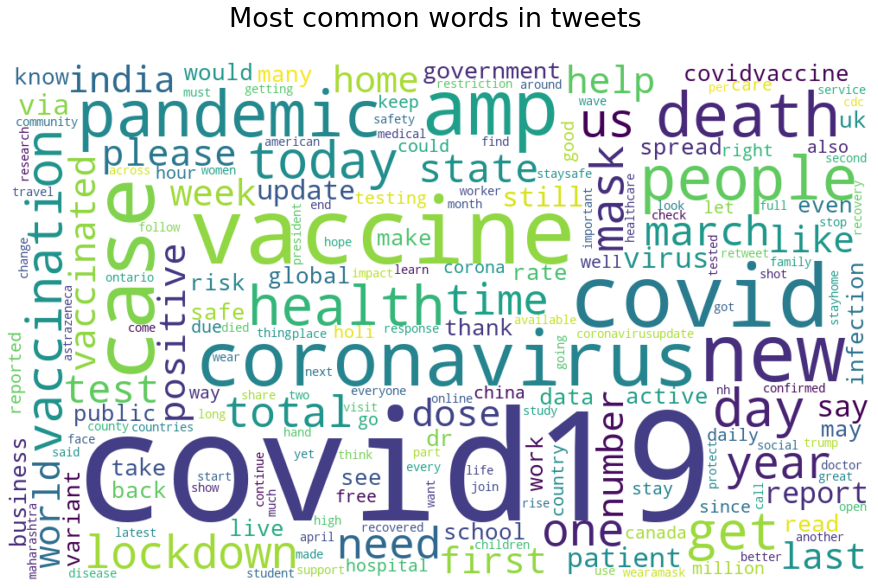

In [254]:
createWordCloud("words",text)

#### As expected, the most common words that pop up in these tweets are all corona related viz. covid19, coronavirus, pandemic, vaccine, death, mask, etc.

### Check Most Frequent Entities

In [75]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avija\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [76]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\avija\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [77]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\avija\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [78]:
# Create dictionary of entities and their frequency in the tweets then create a wordcloud
tt = TweetTokenizer()
entities={}

for sent in tqdm(tweets.clean_tweet):
    for chunk in ne_chunk(pos_tag(tt.tokenize(sent)), binary=True):
        if hasattr(chunk, 'label'):
            if chunk[0][0] in entities.keys():
                entities[chunk[0][0]] = entities[chunk[0][0]]+1
            else:
                entities[chunk[0][0]]=1
                
#sorted by value, return a list of tuples   
top50_entities = sorted(entities.items(), key=lambda x: x[1], reverse=True)[:50]
entities_text = " ".join([(k + " ")*v for k,v in dict(top50_entities).items()])

100%|███████████████████████████████████████████████████████████████████████████| 82758/82758 [04:59<00:00, 276.78it/s]


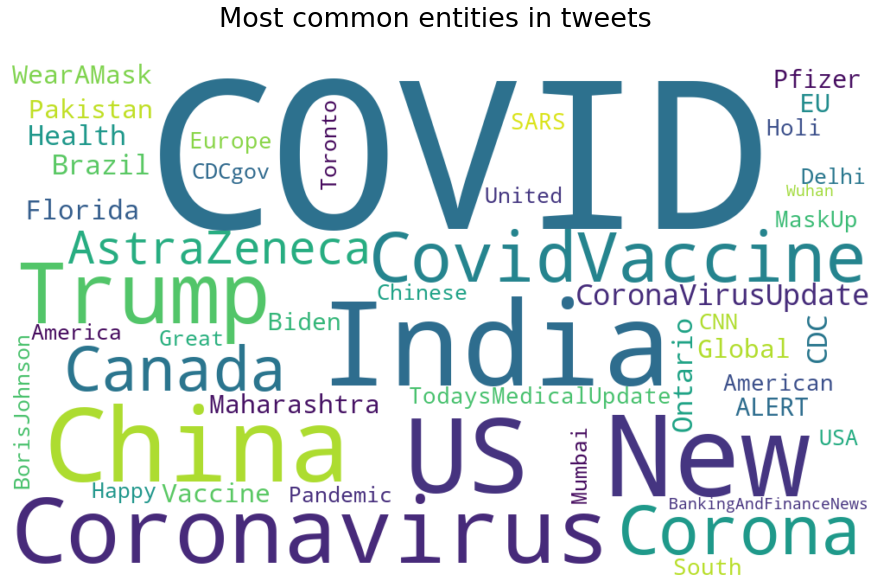

In [79]:
# Plot the most frequent entities to show the frequency trend line
createWordCloud("entities",entities_text)

### Looking into tweets talking about 'Trump'

In [154]:
# # Tweets that has Trump mentioned in them
# trump_tweets = tweets[tweets['clean_tweet'].str.contains("realDonaldTrump|Trump")]
# # trump_tweets.query("sentiment=='Negative'")['clean_tweet'].tail(10)

In [155]:
# trump_tweets.sentiment.value_counts(normalize=True)

In [156]:
test = ['Moderna', 'Johnson and Johnson', 'Pfizer', 'AstraZeneca', 'Sputnik V', 'Donald Trump', 'Science', 'Boris Johnson', 'Joe Biden', 'Jacinda Ardern', 'China', 'America', 'Asian', 'CDC', 'Russia', 'WHO', 'Quarantine', 'Bill Gates', 'Fauci', 'Narendra Modi']

In [157]:
data = pd.DataFrame(columns = ['Negative', 'Neutral', 'Positive'], index = test)

In [158]:
# test = tweets[tweets['clean_tweet'].str.contains("Johnson and Johnson")]
# test.query("sentiment=='Neutral'")['clean_tweet'].tail(10)

In [159]:
# tweets[tweets['clean_tweet'].str.contains('Asian')].sentiment.value_counts(normalize=True)

In [160]:
for i in test:
    l1 = tweets[tweets['clean_tweet'].str.contains(i)].sentiment.value_counts(normalize=True)
    try:
        a = l1['Negative']
    except:
        a = 0
    try:
        b = l1['Neutral']
    except:
        b = 0
    try:
        c = l1['Positive']
    except:
        c = 0      
    data.loc[i] = [a,b,c]

In [161]:
data['Category'] = ['Vaccines']*5 + ['Prominent Figures', 'Global', 'Prominent Figures', 'Prominent Figures', 'Prominent Figures'] +  ['Global']*7 + ['Prominent Figures']*3

In [162]:
data['Tweet Mention'] = data.index

In [163]:
data2 = data.groupby(['Category', 'Tweet Mention']).sum().sort_values(['Category','Negative'],ascending=False)

In [164]:
data.loc['Narendra Modi', 'Positive']

0.7777777777777778

In [165]:
def highlight_cols(s):
    color = 'red'
    return 'background-color: %s' % color

In [167]:
def to_color(val):
    if val in [0.27262044653349, 0.38961038961038963, 0.3330745341614907]:
        return 'background-color: %s' % 'orange'
    elif val in [0.75, 0.7777777777777778, 0.565410199556541]:
        return 'background-color: %s' % 'lightgreen'
    else:
        return ''

In [168]:
# data2.style\
# .apply(lambda x: ['background: red' if x.name == 'Negative' else '' for i in x])\
# .applymap(to_color, subset=['Neutral', 'Positive'])

In [169]:
def to_color2(val):
    if val in [0.5416666666666666, 0.6511627906976745, 0.52]:
        return 'background-color: %s' % 'orangered'
    else:
        return ''

In [170]:
data3 = data2.style\
.applymap(to_color, subset=['Neutral', 'Positive'])\
.applymap(to_color2, subset=['Negative'])

In [171]:
final_df = data3.data

In [172]:
final_df.rename(columns = {'Negative' : 'Negative Sentiment', 'Positive' : 'Positive Sentiment', 'Neutral' : 'Neutral Sentiment'}, inplace = True)

In [173]:
final_df.style\
.applymap(to_color, subset=['Neutral Sentiment', 'Positive Sentiment'])\
.applymap(to_color2, subset=['Negative Sentiment'])